# Group 13 Project Data Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all Cali files from the "./Cali" folder

In [2]:
tk = th.Thicket.from_caliperreader(glob("Cali/*.cali"))

Merge the dataframe and metadata

In [3]:
merged_df = pd.merge(tk.dataframe, tk.metadata, left_on='profile', right_index=True)

Strong Scaling Plot Definition

In [38]:
def plot_strong_scaling(merged_df, input_size, model, region, algorithm):
    plt.figure(figsize=(10, 6))
    exponent = int(math.log2(input_size))

    for input_type in merged_df['InputType'].unique():
        type_df = merged_df[(merged_df['ProgrammingModel'] == model) &
                            (merged_df['InputSize'] == input_size) &
                            (merged_df['name'] == region) &
                            (merged_df['InputType'] == input_type)]

        x = 'num_procs' if model == 'MPI' else 'num_threads'

        grouped = type_df.groupby(x)['Avg time/rank'].mean()
        if not grouped.empty:
            plt.plot(grouped.index, grouped.values, label=f'{input_type}')

    plt.xscale('log', base=2)
    plt.xlabel('Number of Processors/Threads')
    plt.yscale('log', base=10)
    plt.ylabel('Average Time (s)')
    plt.title(f'{algorithm} Strong Scaling for {model} ({region}) with Input Size 2^{exponent}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./Plots/{algorithm}_strong_scaling_{model}_{region}_{input_size}.png')
    plt.show()

Strong Scaling Speedup Plot Definition

In [22]:
def plot_strong_scaling_speedup(merged_df, input_type, model, region, algorithm):
    plt.figure(figsize=(10, 6))

    base_df = merged_df[(merged_df['InputType'] == input_type) &
                        (merged_df['ProgrammingModel'] == model) &
                        (merged_df['name'] == region)]

    x = 'num_procs' if model == 'MPI' else 'num_threads'
    base_time = base_df[base_df[x] == base_df[x].min()]['Avg time/rank'].mean()

    for input_size in np.sort(base_df['InputSize'].unique()):
        exponent = int(math.log2(input_size))
        size_df = base_df[base_df['InputSize'] == input_size]
        grouped = size_df.groupby(x)['Avg time/rank'].mean()
        speedup = base_time / grouped
        plt.plot(grouped.index, speedup, label=f'Input Size 2^{exponent}')

    plt.xscale('log', base=2)
    plt.xlabel('Number of Processors/Threads')
    plt.yscale('log', base=10)
    plt.ylabel('Speedup')
    plt.title(f'{algorithm} Strong Scaling Speedup for {model} ({region}) - {input_type}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./Plots/{algorithm}_strong_scaling_speedup_{model}_{region}_{input_type}.png')
    plt.show()

Weak Scaling Plot Definition

In [23]:
def plot_weak_scaling(merged_df, input_type, model, region, algorithm):
    plt.figure(figsize=(10, 6))
    
    for input_size in np.sort(merged_df['InputSize'].unique()):
        exponent = int(math.log2(input_size))

        size_df = merged_df[(merged_df['ProgrammingModel'] == model) &
                            (merged_df['name'] == region) &
                            (merged_df['InputSize'] == input_size) &
                            (merged_df['InputType'] == input_type)]

        x = 'num_procs' if model == 'MPI' else 'num_threads'

        grouped = size_df.groupby(x)['Avg time/rank'].mean()

        if not grouped.empty:
            plt.plot(grouped.index, grouped.values, label=f'Input Size 2^{exponent}')

    plt.xscale('log', base=2)
    plt.xlabel('Number of Processors/Threads')
    plt.yscale('log', base=10)
    plt.ylabel('Execution Time (s)')
    plt.title(f'{algorithm} Weak Scaling for {model} ({region}) - {input_type}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./Plots/{algorithm}_weak_scaling_{model}_{region}_{input_type}.png')
    plt.show()

Define Variables to Loop Through

In [24]:
input_sizes = [2**x for x in range(16, 29, 2)]
regions = ['comp_large', 'comm', 'main']
implementations = ['MPI', 'CUDA']
input_types = ['Sorted', 'Random', 'Reverse Sorted', '1% Perturbed']
algorithm = 'Sample Sort'

Create Strong Scaling Plots

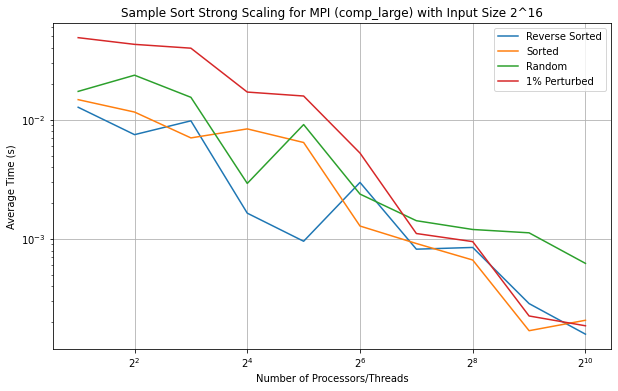

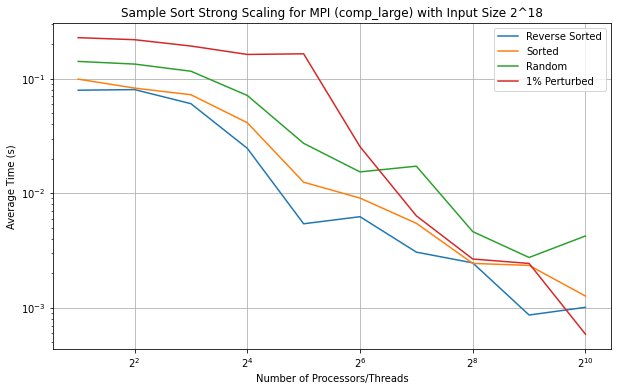

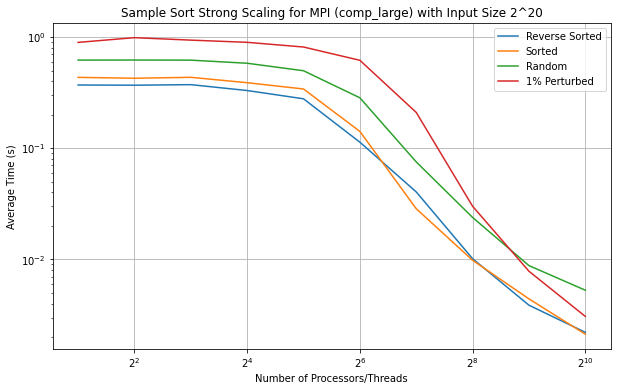

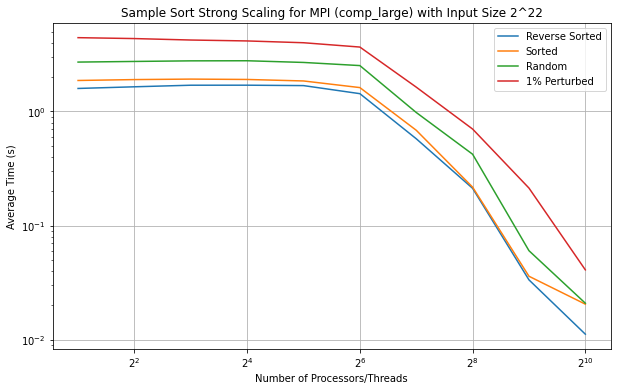

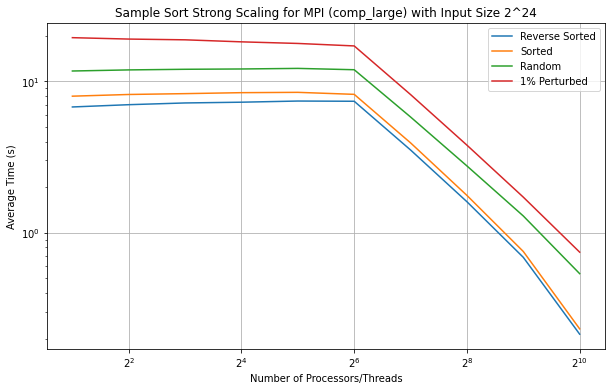

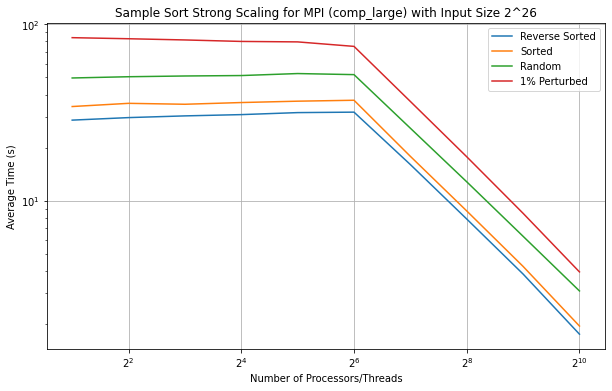

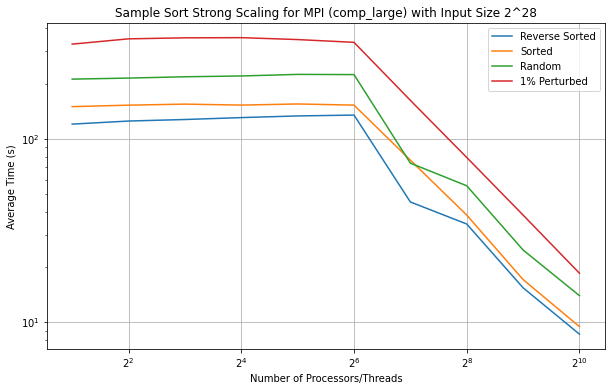

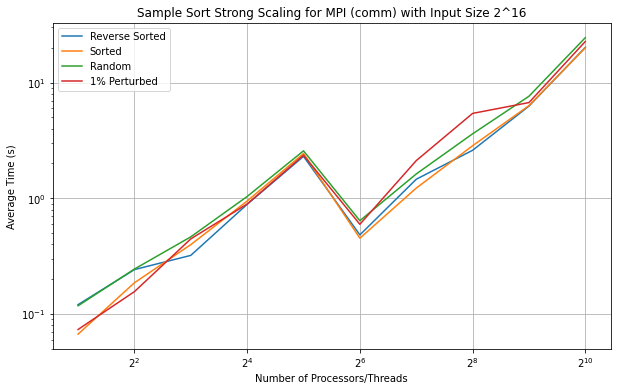

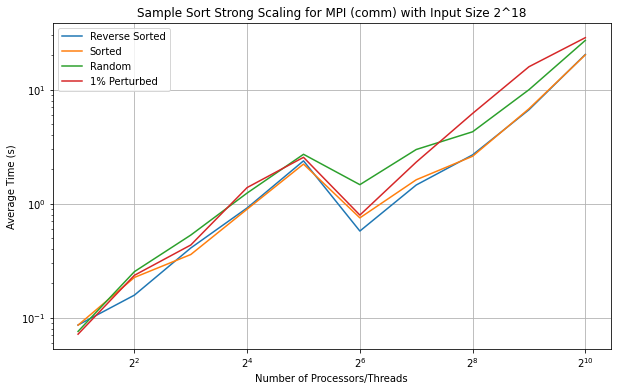

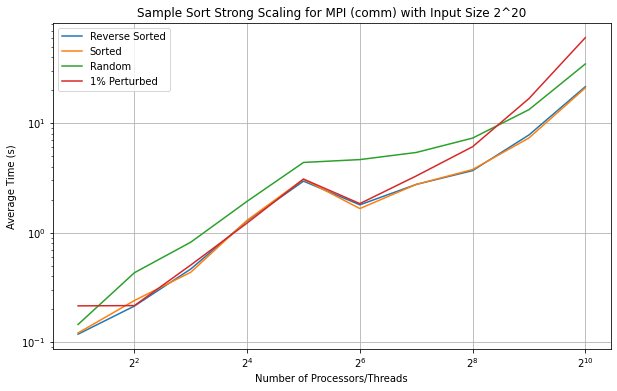

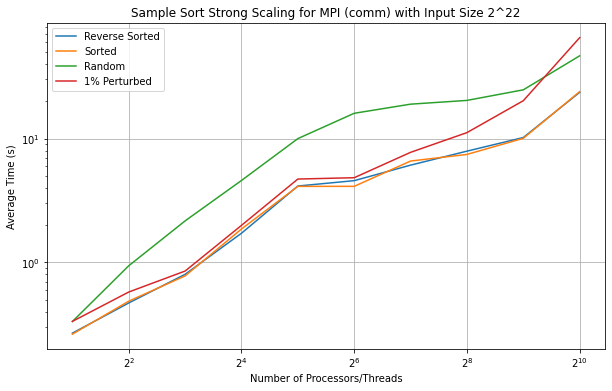

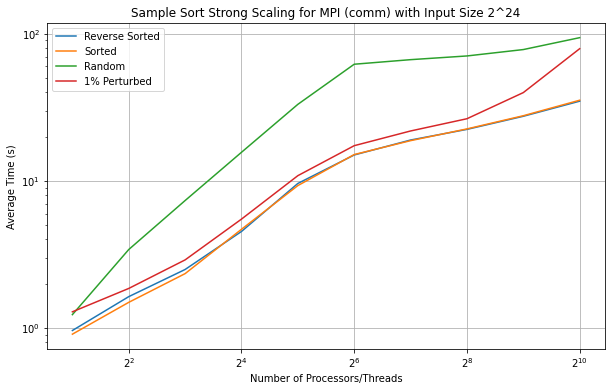

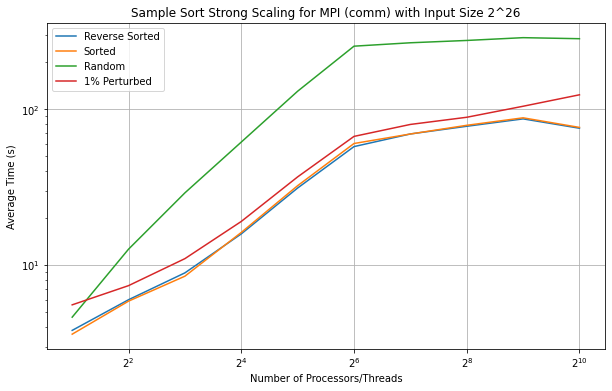

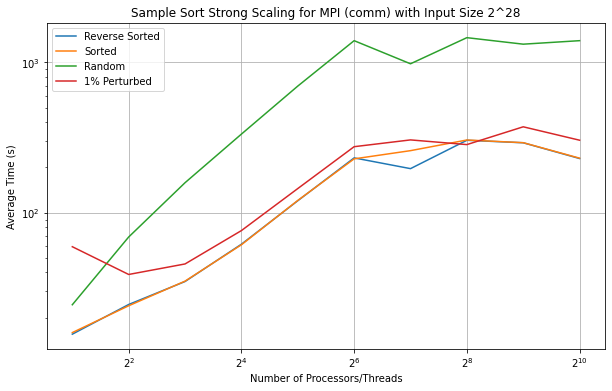

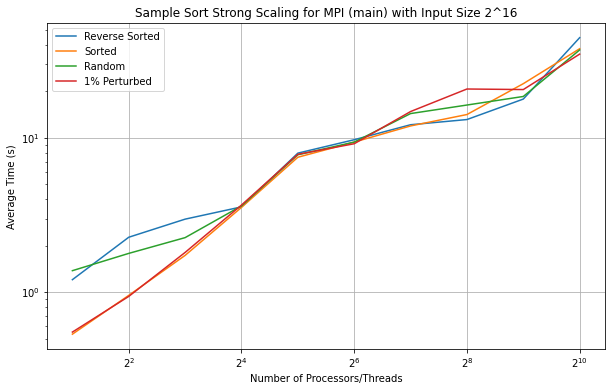

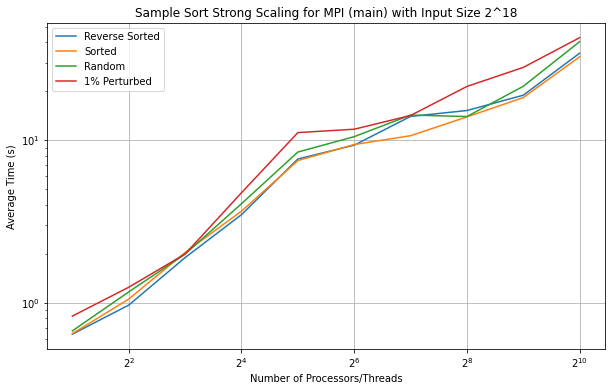

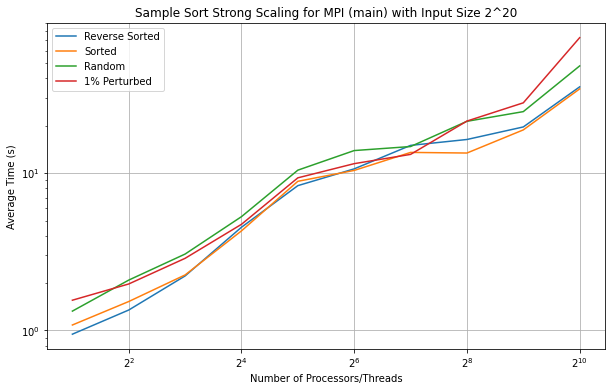

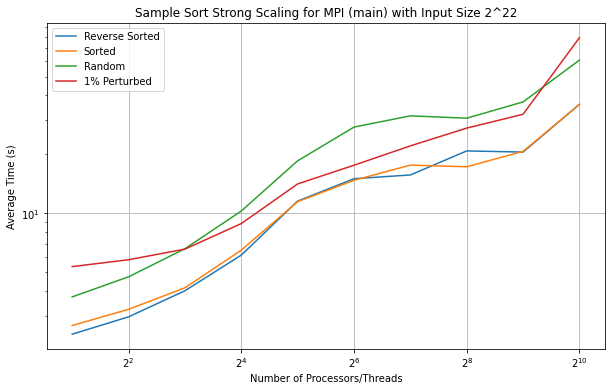

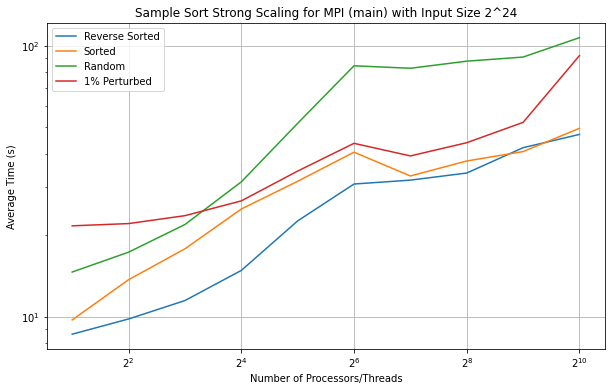

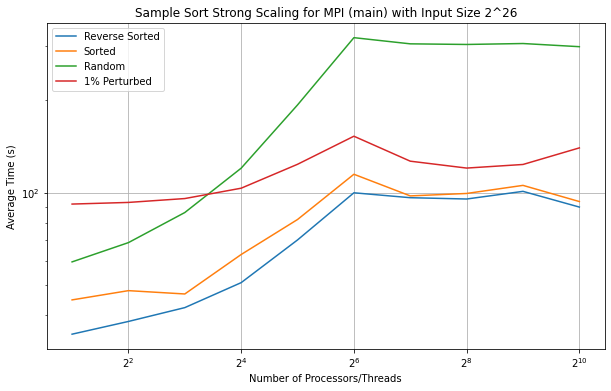

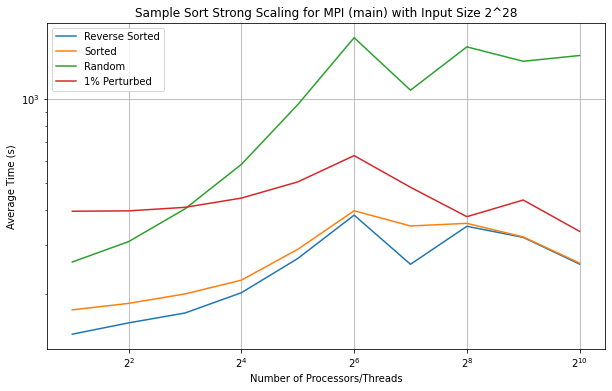

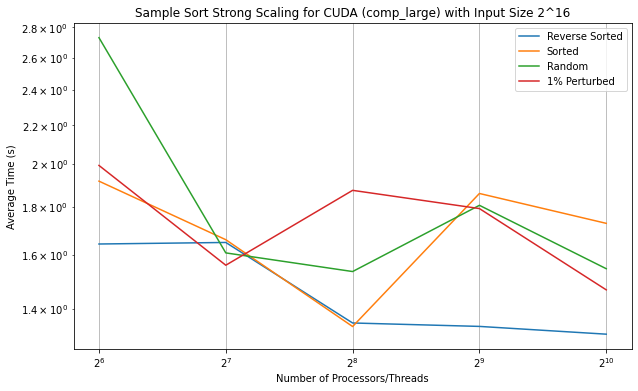

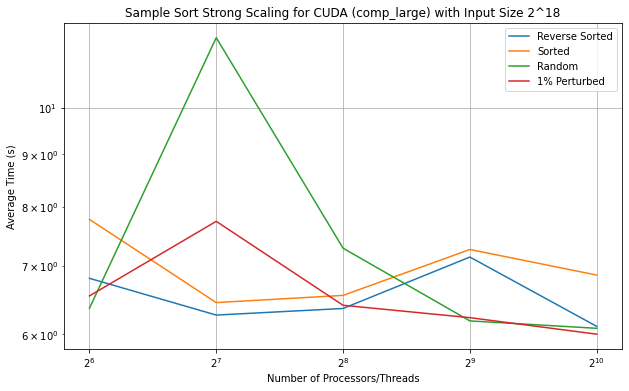

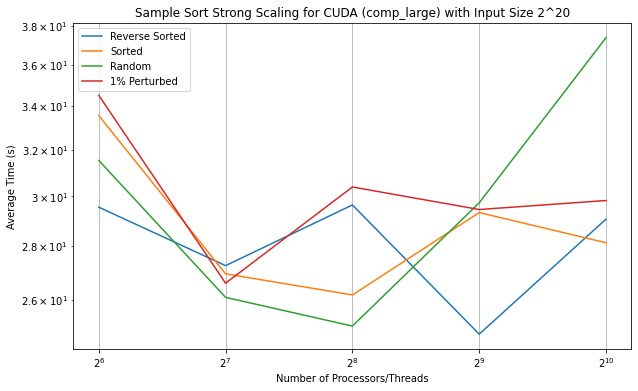

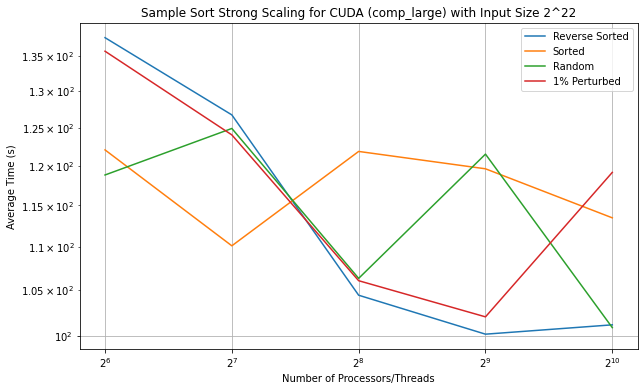

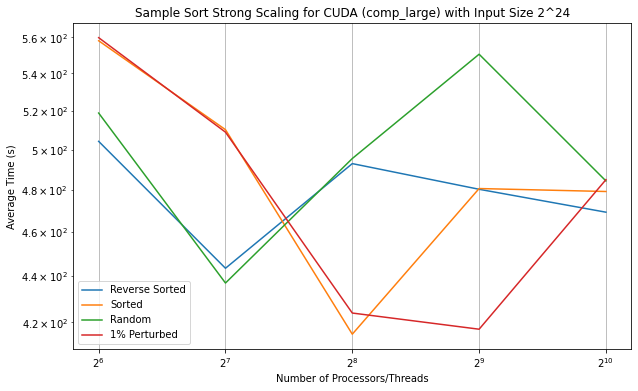

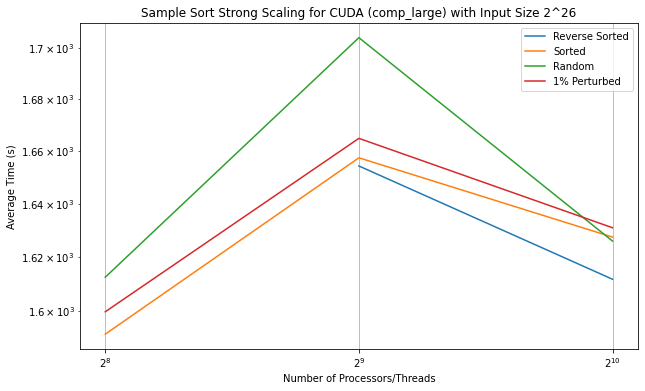

No handles with labels found to put in legend.


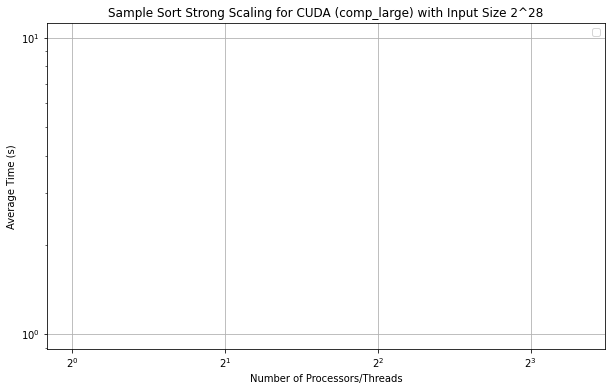

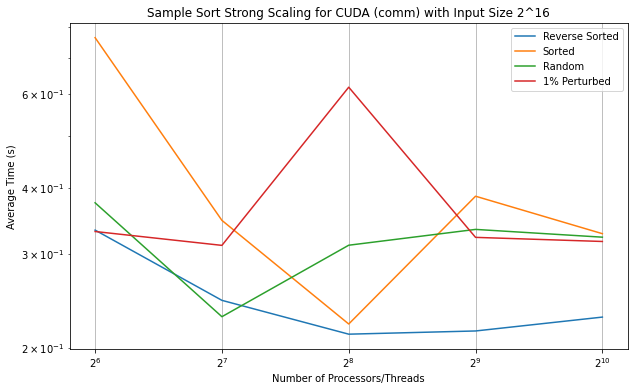

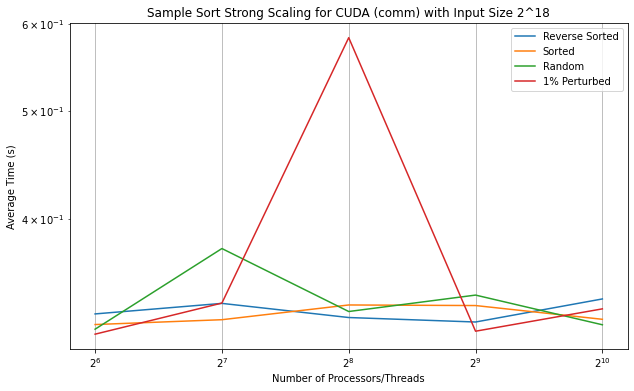

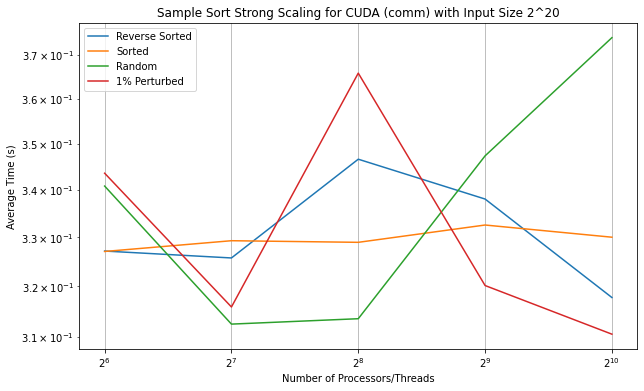

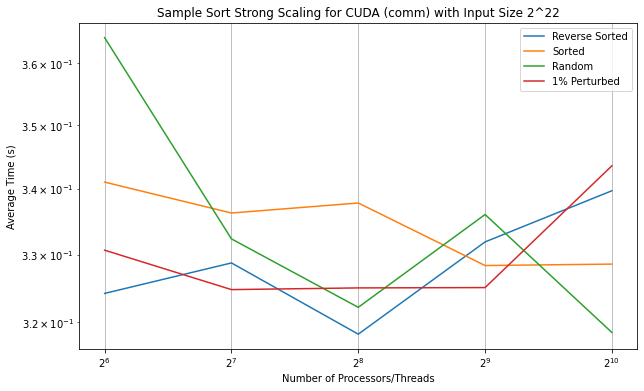

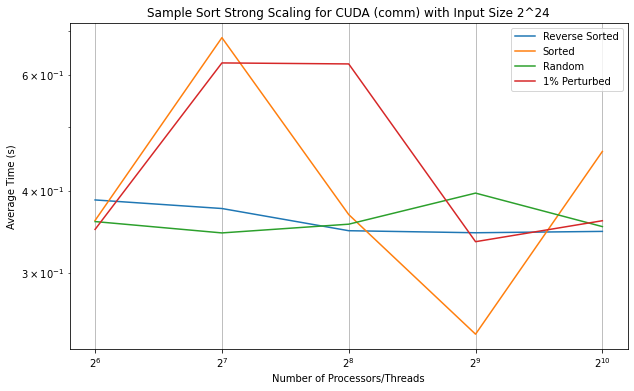

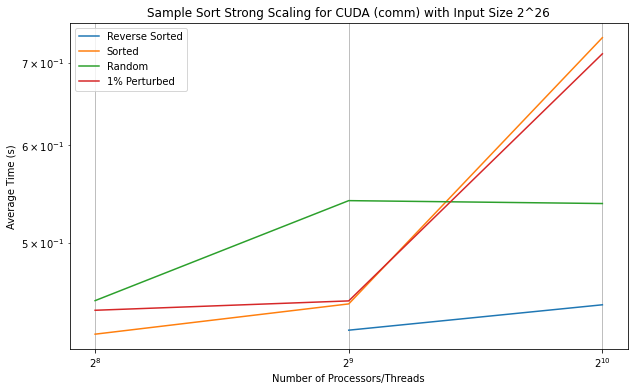

No handles with labels found to put in legend.


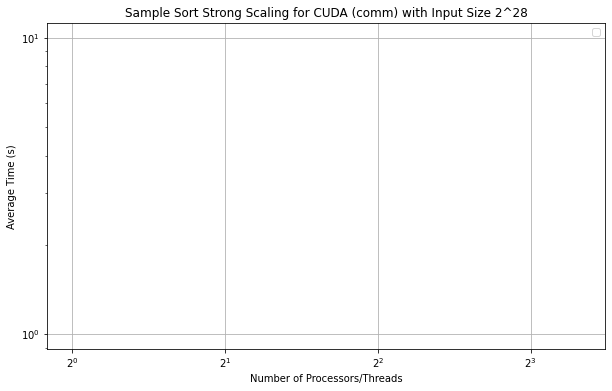

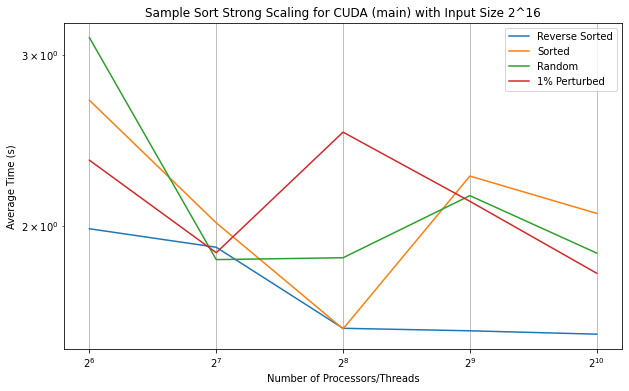

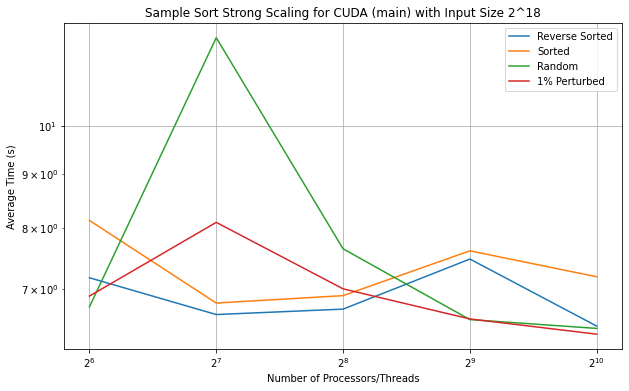

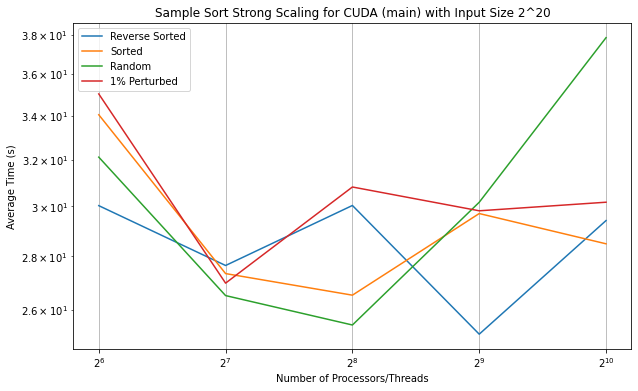

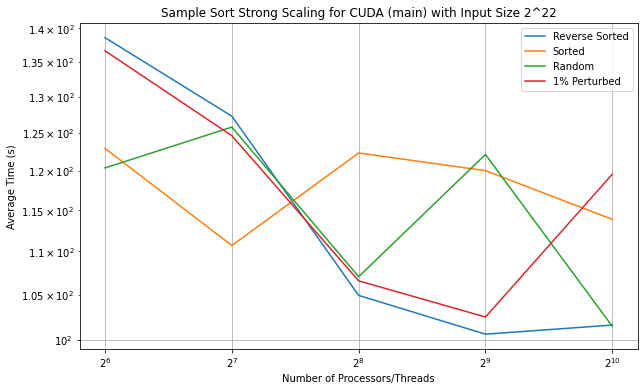

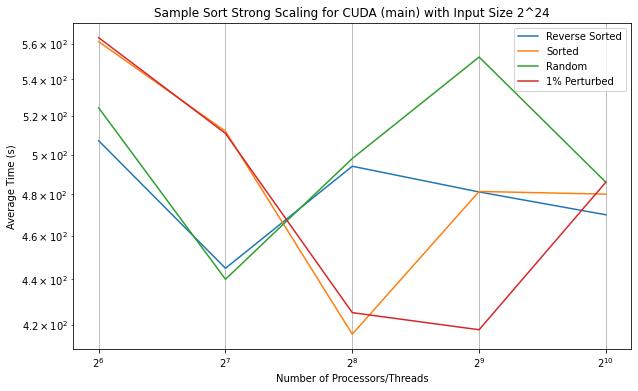

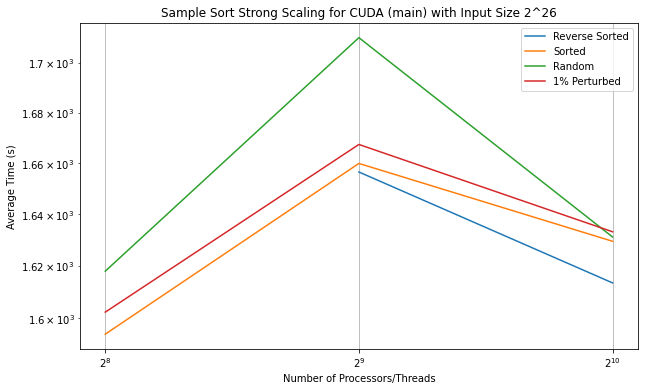

No handles with labels found to put in legend.


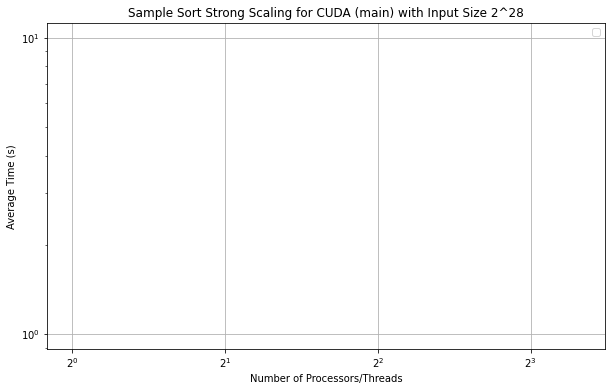

In [40]:
for implementation in implementations:
    for region in regions:
        for input_size in input_sizes:
            plot_strong_scaling(merged_df, input_size, implementation, region, algorithm)

Create Strong Scaling Speedup Plots

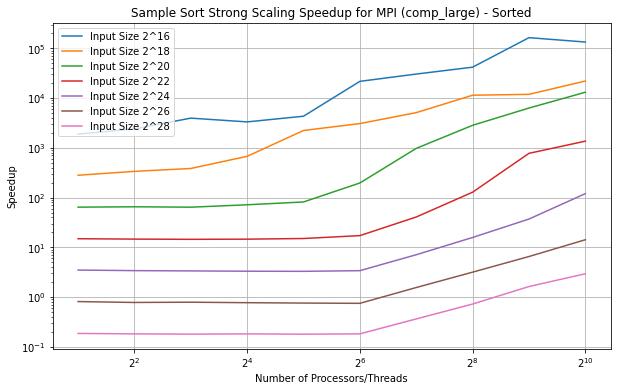

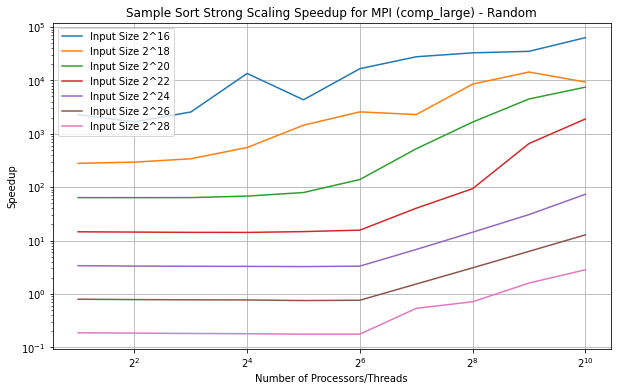

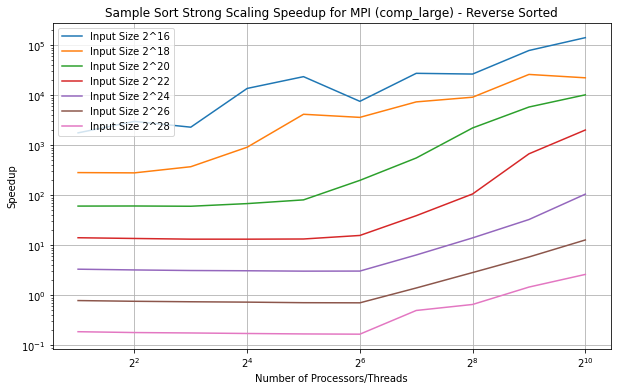

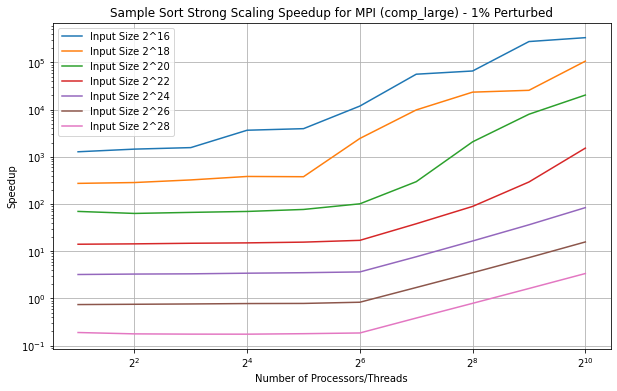

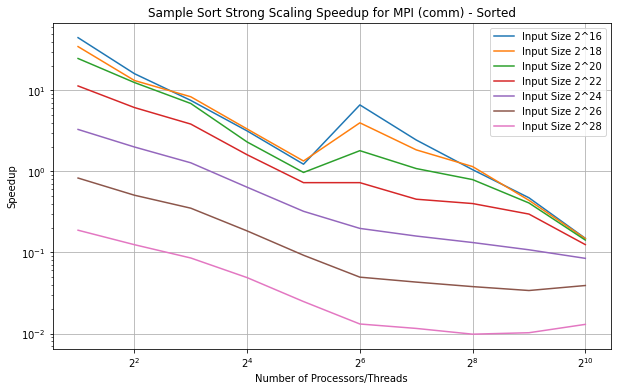

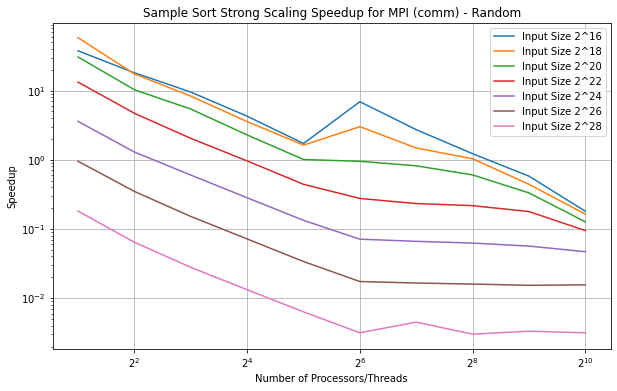

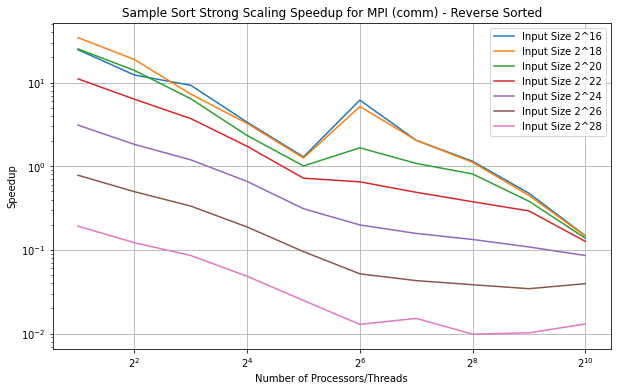

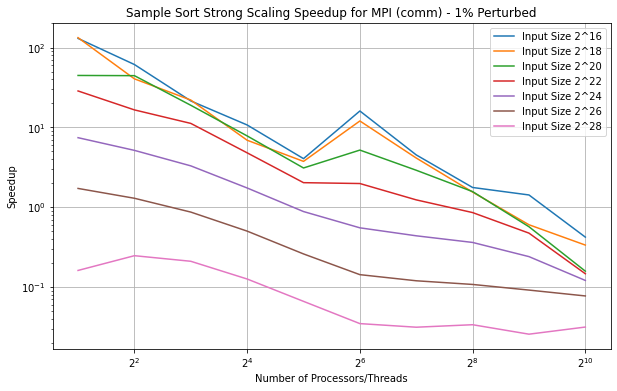

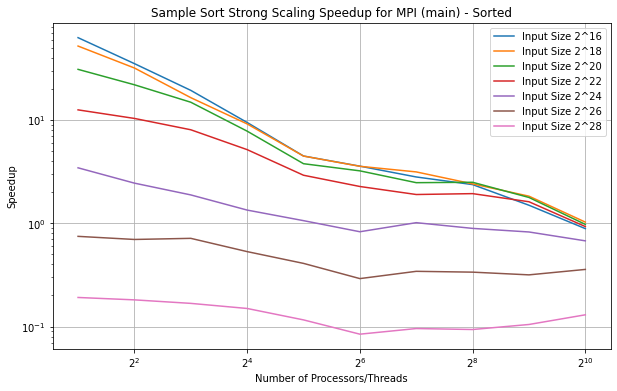

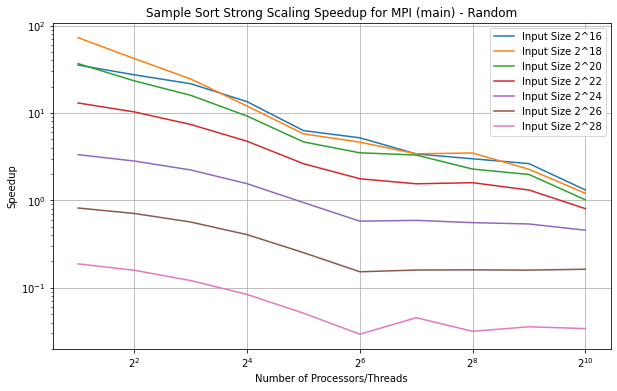

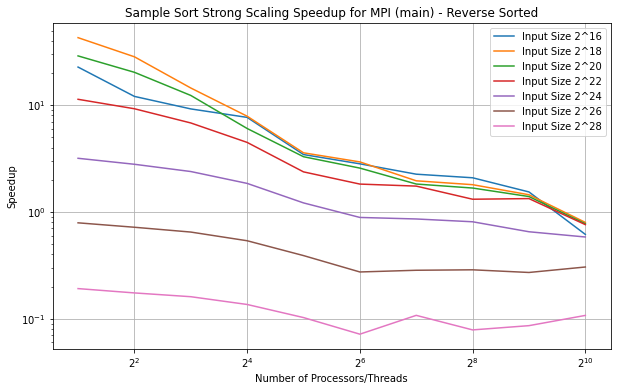

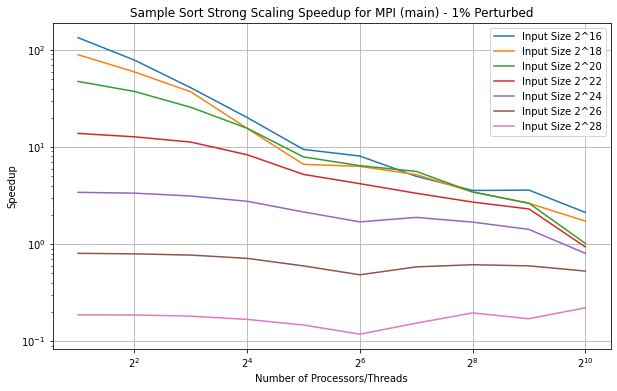

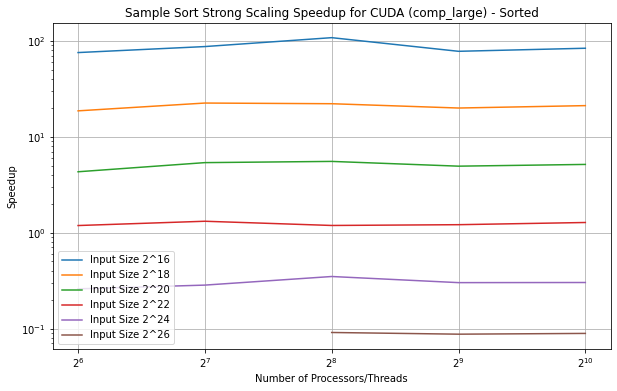

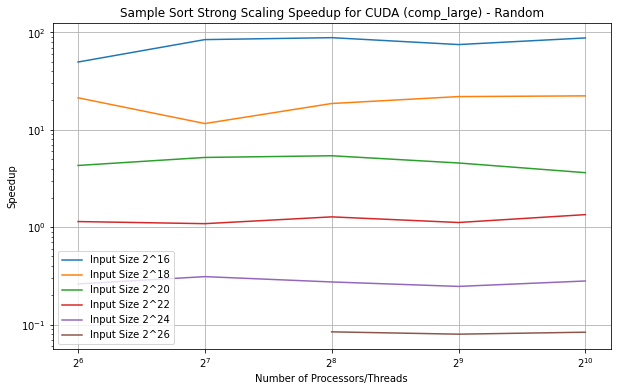

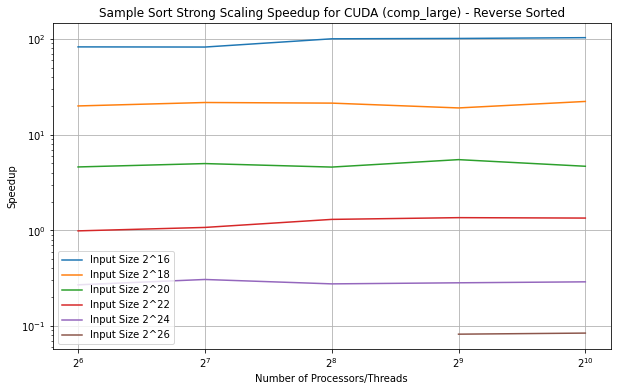

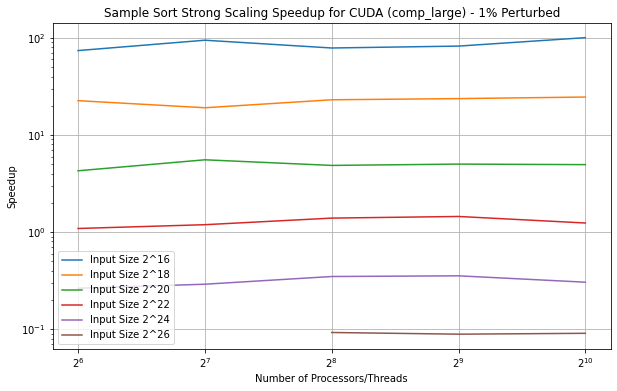

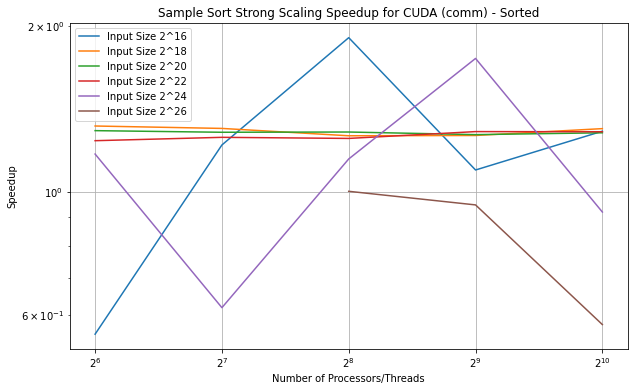

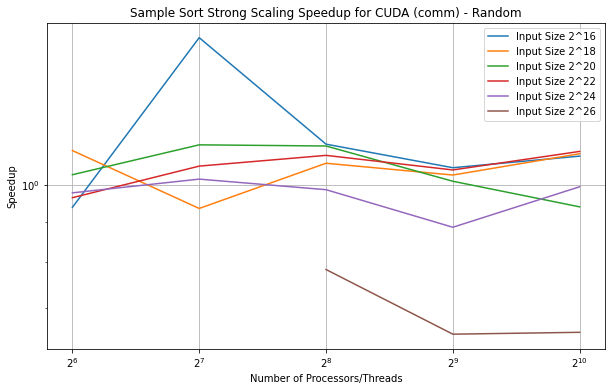

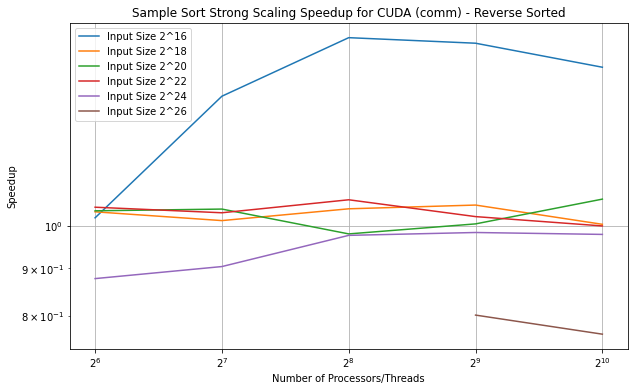

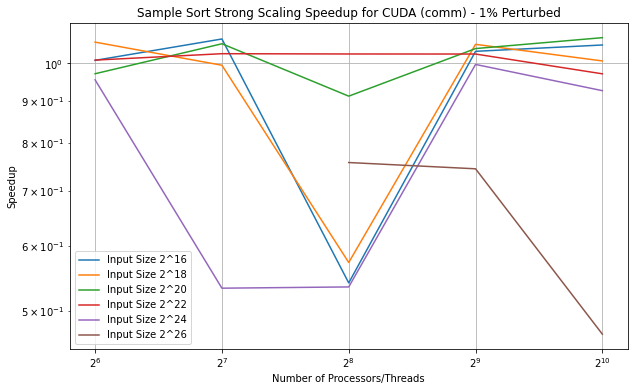

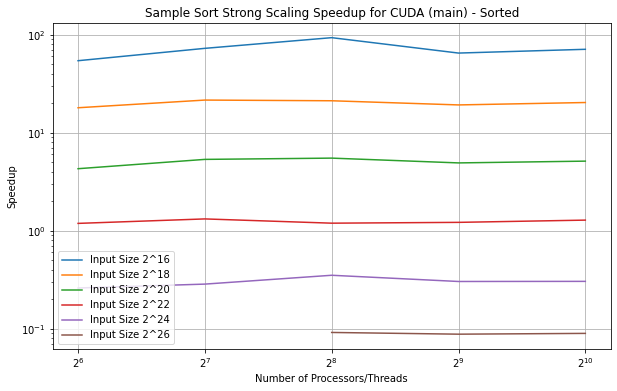

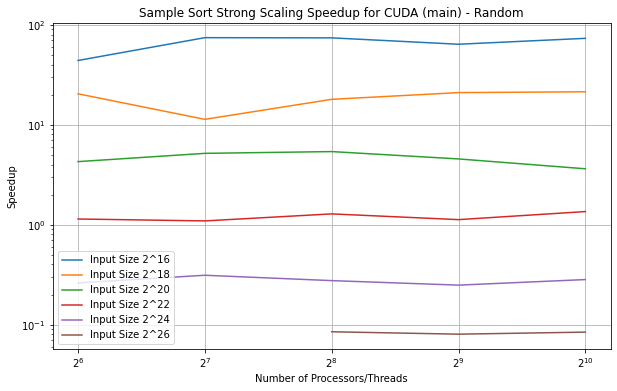

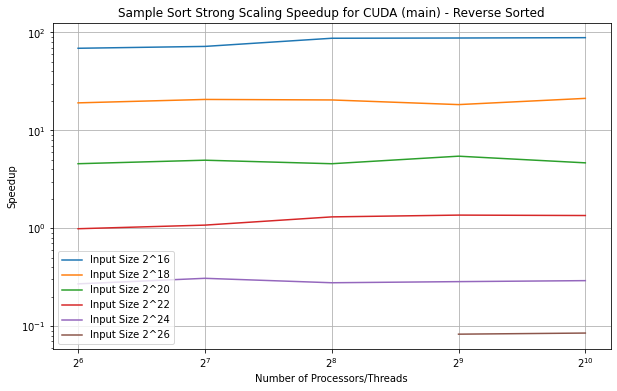

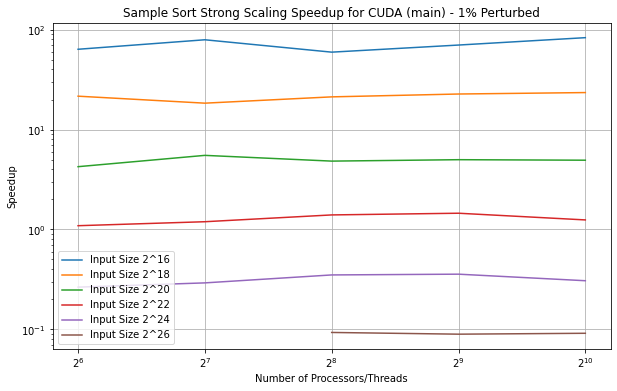

24


In [31]:
for implementation in implementations:
    for region in regions:
        for input_type in input_types:
            plot_strong_scaling_speedup(merged_df, input_type, implementation, region, algorithm)

Create Weak Scaling Plots

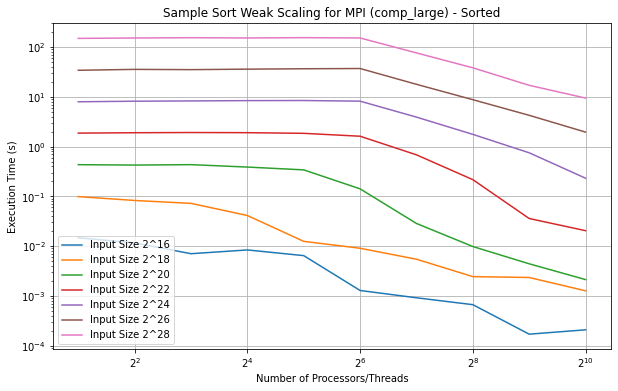

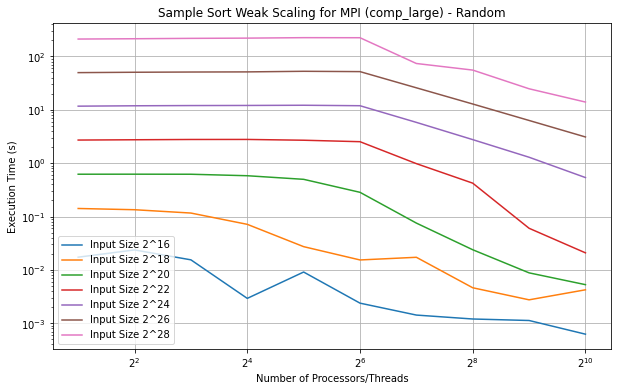

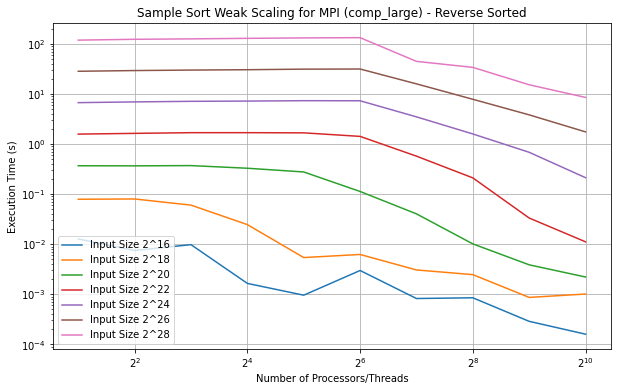

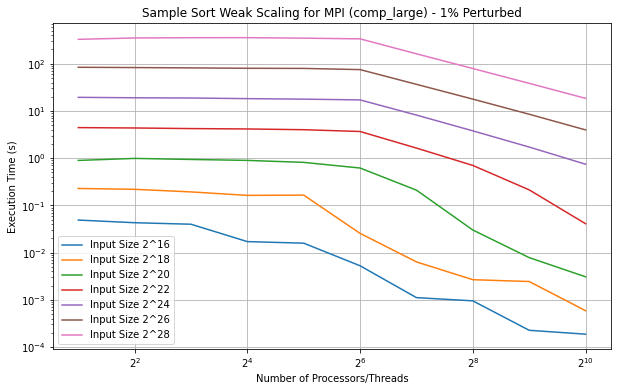

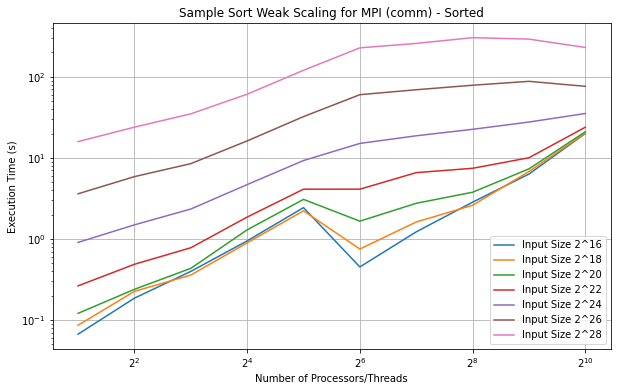

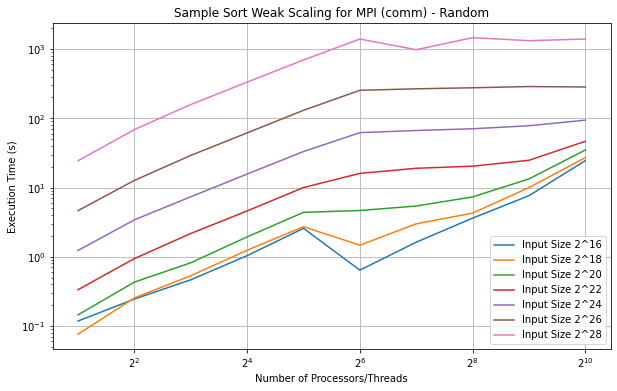

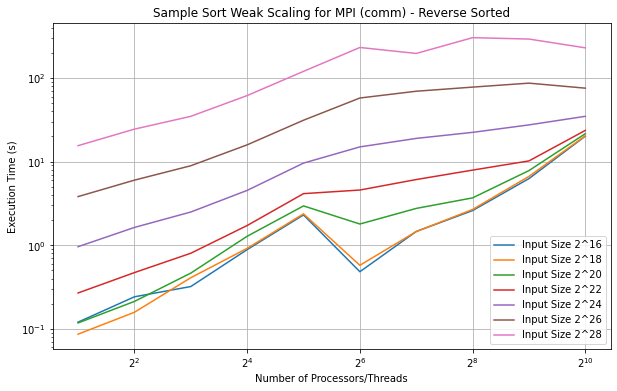

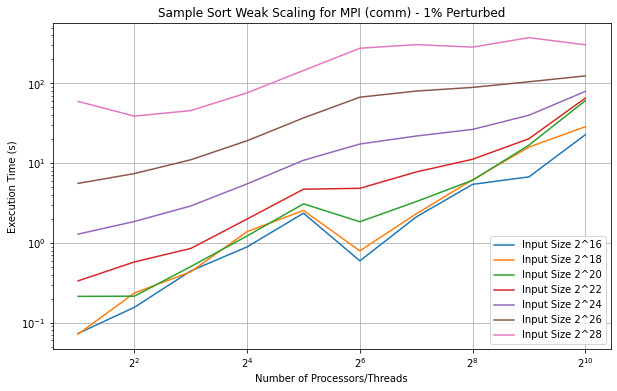

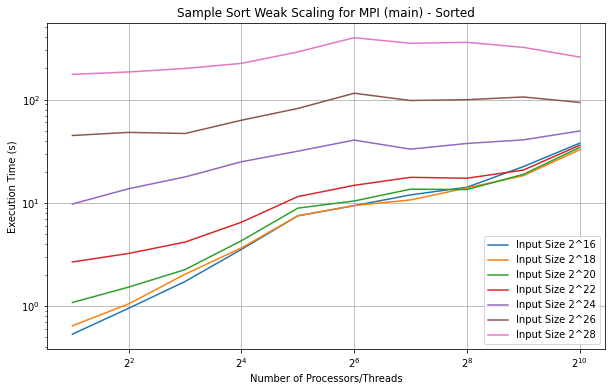

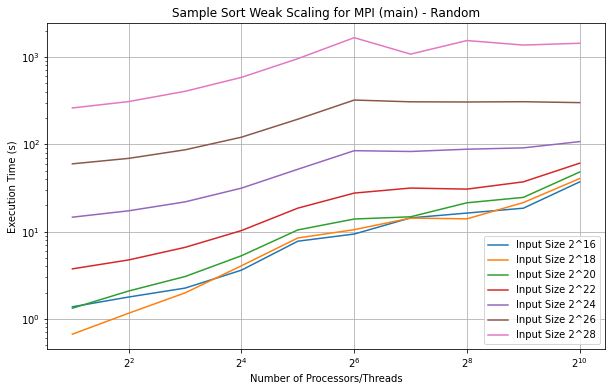

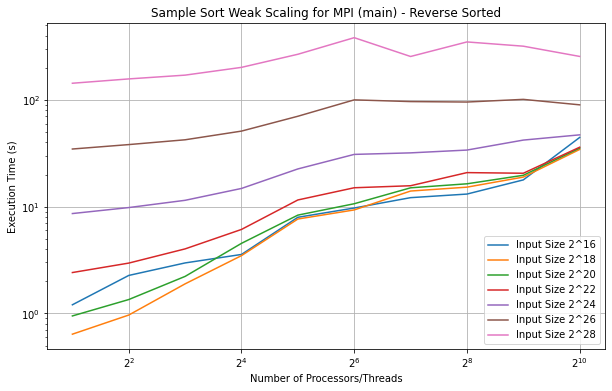

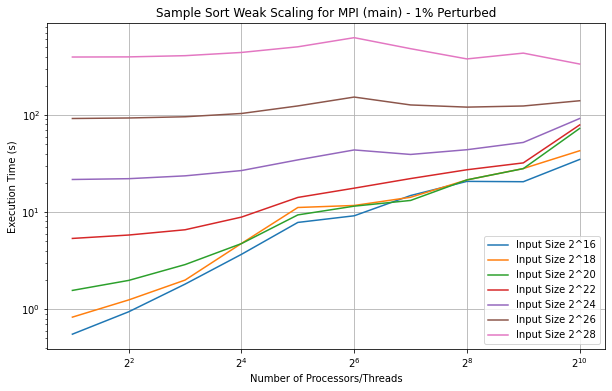

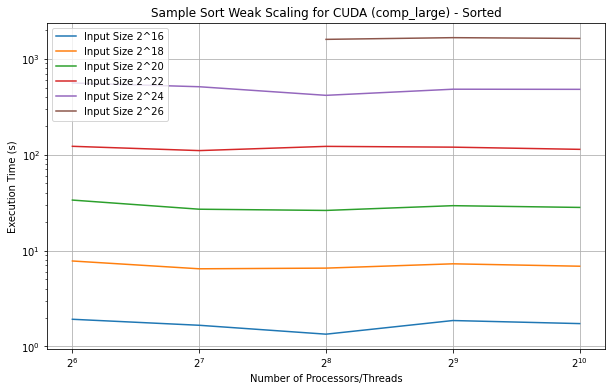

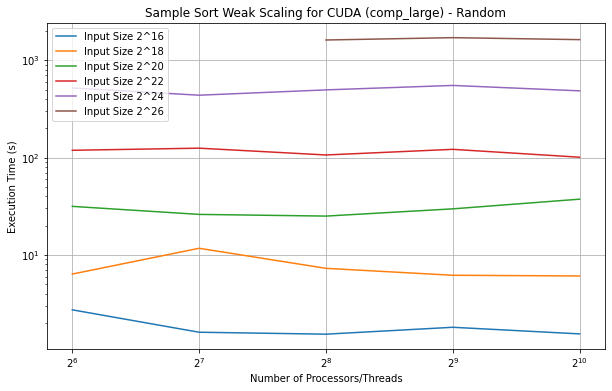

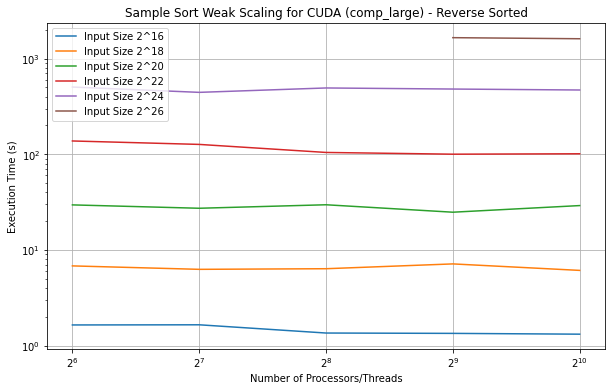

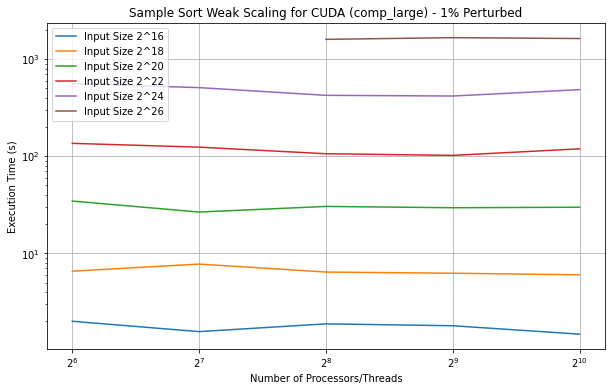

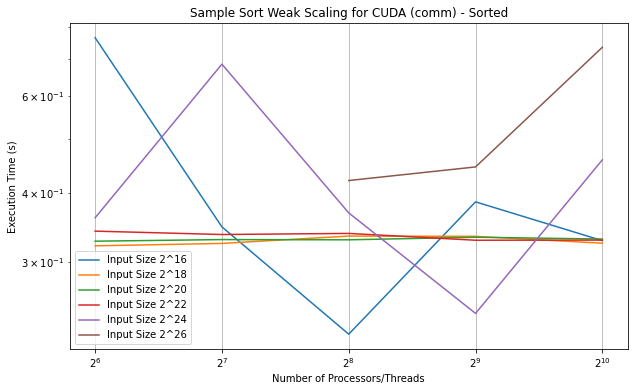

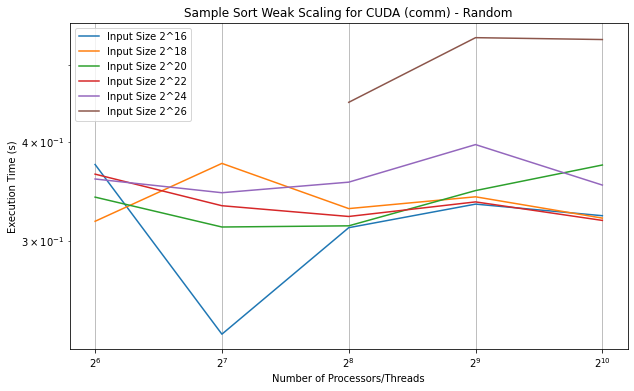

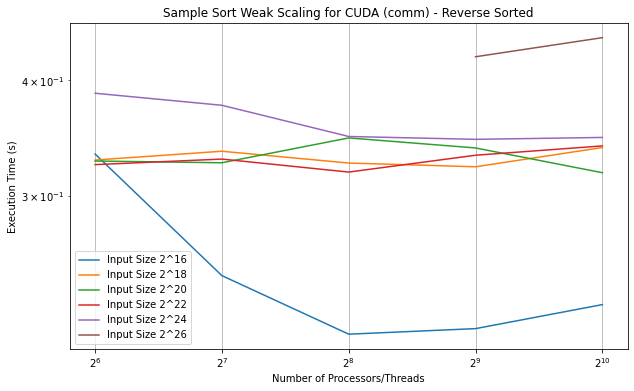

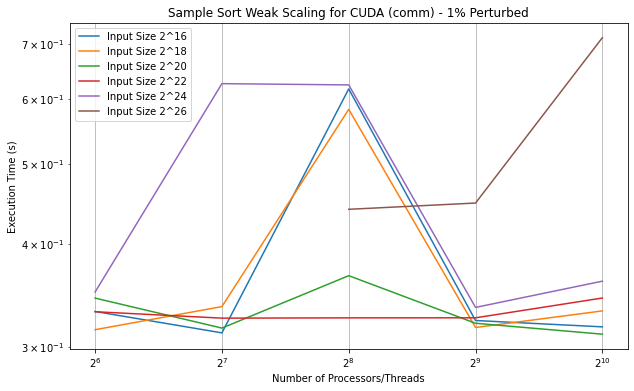

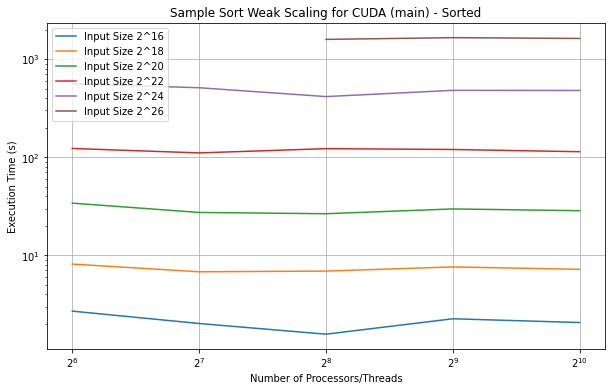

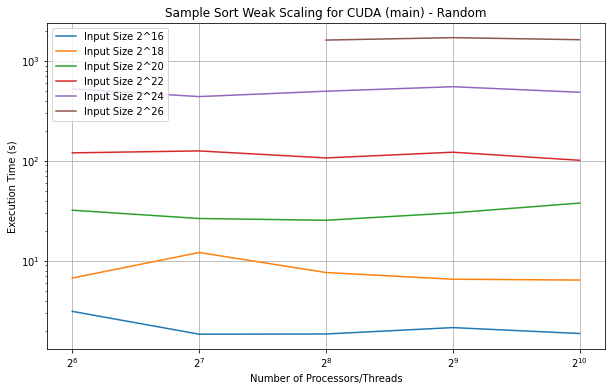

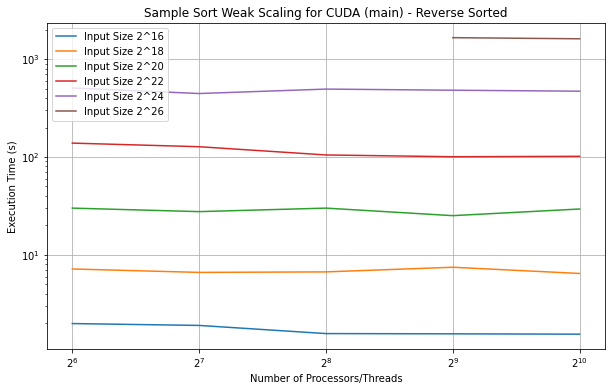

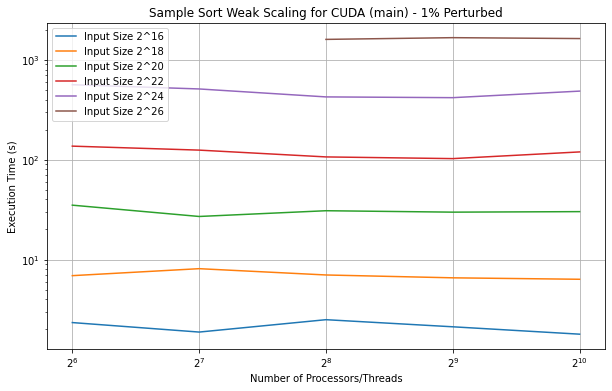

24


In [32]:
for implementation in implementations:
    for region in regions:
        for input_type in input_types:
            plot_weak_scaling(merged_df, input_type, implementation, region, algorithm)